In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
import warnings


In [2]:
# Problem 1

In [ ]:
# The confusion matrix is shown in cell 12

# The accuracy, Precision, and Recall are all shown in cell 11

In [3]:
dataset = pd.read_csv('diabetes.csv') # import data
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
Y = dataset.iloc[:,8] # Outcome set to Y variable
X = dataset.iloc[:,[0,1,2,3,4,5,6,7]] # Other inputs set to X variable

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0) # splitting the data

In [6]:
sc_X = StandardScaler() # setting scaler to scale data
X_train = sc_X.fit_transform(X_train) # scaling the data
X_test = sc_X.transform(X_test) # scaling the data

In [7]:
classifier = LogisticRegression(random_state=0) # setting classifier as log regression
classifier.fit(X_train,Y_train) # fitting the training data for log regression

LogisticRegression(random_state=0)

In [8]:
Y_pred = classifier.predict(X_test) # predicting the outcome based on test data

In [9]:
Y_pred[0:9]

array([1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [10]:
cnf_matrix = confusion_matrix(Y_test,Y_pred) # setting up confusion matrix
cnf_matrix

array([[98,  9],
       [18, 29]], dtype=int64)

In [11]:
print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred)) # Accuracy for Log Regression
print("Precision:",metrics.precision_score(Y_test,Y_pred)) # Precision for log Regression
print("Recall:",metrics.recall_score(Y_test,Y_pred)) # Recall for log Regression

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447


Text(0.5, 257.44, 'Predicted label')

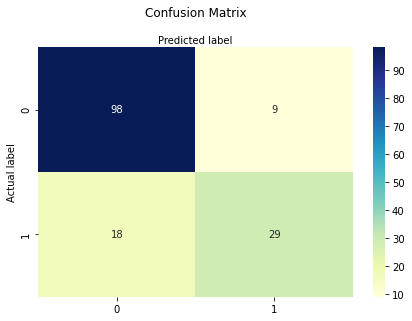

In [12]:
# plotting confusion matrix
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [13]:
# Problem 2

In [14]:
# The Logistic Regression is more accurate than Naive Bays from my results
# Meaning this methad is less accurate than the method (Logistic Regression) that
# was used in Problem 1, this is shown in cell 19

In [ ]:
# The confusion matrix is shown in cell 20

# The accuracy, Precision, and Recall are shown in cell 19

In [15]:
classifier = GaussianNB() # setting classifier to Naive Bays
classifier.fit(X_train, Y_train) # fitting the data to the classifier using training data

GaussianNB()

In [16]:
Y2_pred = classifier.predict(X_test) # predicting outcome

In [17]:
Y2_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [18]:
cm = confusion_matrix(Y_test, Y2_pred) # setting up confusion matrix
cm

array([[93, 14],
       [18, 29]], dtype=int64)

In [19]:
print("Accuracy:",metrics.accuracy_score(Y_test,Y2_pred)) # Accuracy for Naive Bays
print("Precision:",metrics.precision_score(Y_test,Y2_pred)) # Precision for Naive Bays
print("Recall:",metrics.recall_score(Y_test,Y2_pred)) # Recall for Naive Bays

Accuracy: 0.7922077922077922
Precision: 0.6744186046511628
Recall: 0.6170212765957447


Text(0.5, 257.44, 'Predicted label')

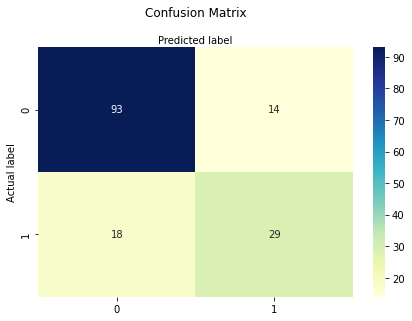

In [20]:
# plotting confusion matrix
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
# Problem 3 k = 5

In [22]:
# Logisitc Regression in Problem 1 is more accurate than k-fold when k = 5 shown in Cell 22

In [23]:
num_k = RepeatedKFold(n_splits = 5, n_repeats = 5, random_state = 0) # using K-fold cross validation for k = 5
classifier = LogisticRegression(random_state=0) # setting classifier for log regression (doing k-fold of log regression)
Y3_pred = cross_validate(classifier, X, Y, scoring = {'accuracy', 'precision', 'recall'}, cv = num_k, n_jobs = -1) # predicting outcome 

In [24]:
print("K-fold cross-validation k = 5 \n") # Accuracy, Precision, and Recall
print("Accuracy: ", np.mean(Y3_pred['test_accuracy']))
print("Precision: ", np.mean(Y3_pred['test_precision']))
print("Recall: ", np.mean(Y3_pred['test_recall']))

K-fold cross-validation k = 5 

Accuracy:  0.7705967235379001
Precision:  0.720218694678401
Recall:  0.5638606745383078


In [25]:
# Problem 3 k = 10

In [26]:
# Logisitc Regression in Problem 1 is more accurate than k-fold when k = 10 shown in Cell 28

In [27]:
num_k = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state = 0) # repeating the same steps from cells 23 and 24 for k = 10
classifier = LogisticRegression(random_state=0)
Y3_pred = cross_validate(classifier, X, Y, scoring = {'accuracy', 'precision', 'recall'}, cv = num_k, n_jobs = -1)

In [28]:
print("K-fold cross-validation k = 10 \n") # Accuracy, Precision, and Recall
print("Accuracy: ", np.mean(Y3_pred['test_accuracy']))
print("Precision: ", np.mean(Y3_pred['test_precision']))
print("Recall: ", np.mean(Y3_pred['test_recall']))

K-fold cross-validation k = 10 

Accuracy:  0.7754938482570062
Precision:  0.7241785807699511
Recall:  0.5727296205268064


In [29]:
# Problem 4 k = 5

In [ ]:
# When looping Naive Bays, you get separate data for accuracy, precision, and recall. Then you average them together 
# which doesn't make any sense to do. This is why k-fold for Naive Bays is not needed

In [ ]:
# For k = 5, our accuracy compared to problem 2 is less accurate, this makes sense because of what was stated earlier
# we are splitting the same data up k separate amount of times, none of the data correlates with each other

In [30]:
num_k = RepeatedKFold(n_splits = 5, n_repeats = 5, random_state = 0) # K-fold for Naive Bays
classifier = GaussianNB() # setting classifier to Naive Bays
Y3_pred = cross_validate(classifier, X, Y, scoring = {'accuracy', 'precision', 'recall'}, cv = num_k, n_jobs = -1) # predicting outcome

In [31]:
print("K-fold cross-validation k = 5 \n") # Accuracy, Precision, and Recall
print("Accuracy: ", np.mean(Y3_pred['test_accuracy']))
print("Precision: ", np.mean(Y3_pred['test_precision']))
print("Recall: ", np.mean(Y3_pred['test_recall']))

K-fold cross-validation k = 5 

Accuracy:  0.7515898480604362
Precision:  0.6584235973031567
Recall:  0.5980968033980192


In [32]:
# Problem 4 k = 10

In [ ]:
# When looping Naive Bays, you get separate data for accuracy, precision, and recall. Then you average them together 
# which doesn't make any sense to do. This is why k-fold for Naive Bays is not needed

In [ ]:
# For k = 10, our accuracy compared to problem 2 is less accurate, this makes sense because of what was stated earlier
# we are splitting the same data up k separate amount of times, none of the data correlates with each other

In [33]:
num_k = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state = 0) # repeating cells 30 and 31 for k=10
classifier = GaussianNB()
Y3_pred = cross_validate(classifier, X, Y, scoring = {'accuracy', 'precision', 'recall'}, cv = num_k, n_jobs = -1)

In [34]:
print("K-fold cross-validation k = 10 \n") # Accuracy, Precision, and Recall
print("Accuracy: ", np.mean(Y3_pred['test_accuracy']))
print("Precision: ", np.mean(Y3_pred['test_precision']))
print("Recall: ", np.mean(Y3_pred['test_recall']))

K-fold cross-validation k = 10 

Accuracy:  0.7523120300751879
Precision:  0.6575639731593639
Recall:  0.596102629011288
